<a href="https://colab.research.google.com/github/Akshat30/cse151Aproject/blob/main/Copy_of_cse151Aproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Akshat30/cse151Aproject

Cloning into 'cse151Aproject'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 6.09 MiB | 9.04 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import song data
song_data = pd.read_csv("/content/cse151Aproject/spotifydata_withpopularity.csv")

In [15]:
# Printing info for dataframe
print(song_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130 entries, 0 to 10129
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entry             10130 non-null  int64  
 1   danceability      10127 non-null  float64
 2   energy            10127 non-null  float64
 3   key               10127 non-null  float64
 4   loudness          10127 non-null  float64
 5   mode              10127 non-null  float64
 6   speechiness       10127 non-null  float64
 7   acousticness      10130 non-null  float64
 8   instrumentalness  10130 non-null  float64
 9   liveness          10130 non-null  float64
 10  valence           10130 non-null  float64
 11  tempo             10130 non-null  float64
 12  type              10130 non-null  object 
 13  id                10130 non-null  object 
 14  uri               10130 non-null  object 
 15  track_href        10130 non-null  object 
 16  analysis_url      10130 non-null  object

In [16]:
# Dataframe's describe insights
print(song_data.describe())

              entry  danceability        energy           key      loudness  \
count  10130.000000  10127.000000  10127.000000  10127.000000  10127.000000   
mean    5064.500000      0.581843      0.540481      5.214575     -9.554459   
std     2924.423447      0.166553      0.266178      3.562244      6.432424   
min        0.000000      0.000000      0.000707      0.000000    -43.851000   
25%     2532.250000      0.473000      0.340000      2.000000    -11.582500   
50%     5064.500000      0.592000      0.578000      5.000000     -7.510000   
75%     7596.750000      0.703000      0.757000      8.000000     -5.307500   
max    10129.000000      0.978000      0.996000     11.000000     -0.150000   

               mode   speechiness  acousticness  instrumentalness  \
count  10127.000000  10127.000000  10130.000000      10130.000000   
mean       0.631974      0.077888      0.384464          0.191026   
std        0.482292      0.082423      0.357545          0.339254   
min        0

In [17]:
print(song_data[song_data['popularity'] == 0].count())

# 2479 songs have a popularity of 0

entry               2479
danceability        2477
energy              2477
key                 2477
loudness            2477
mode                2477
speechiness         2477
acousticness        2479
instrumentalness    2479
liveness            2479
valence             2479
tempo               2479
type                2479
id                  2479
uri                 2479
track_href          2479
analysis_url        2479
duration_ms         2479
time_signature      2479
song_name           2479
artist              2470
genre               2479
popularity          2479
dtype: int64


In [44]:
# Drop non numerical columns (entry is just a counter)
song_data_numerical = song_data.drop(['entry', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'artist', 'genre'], axis=1)

<Axes: >

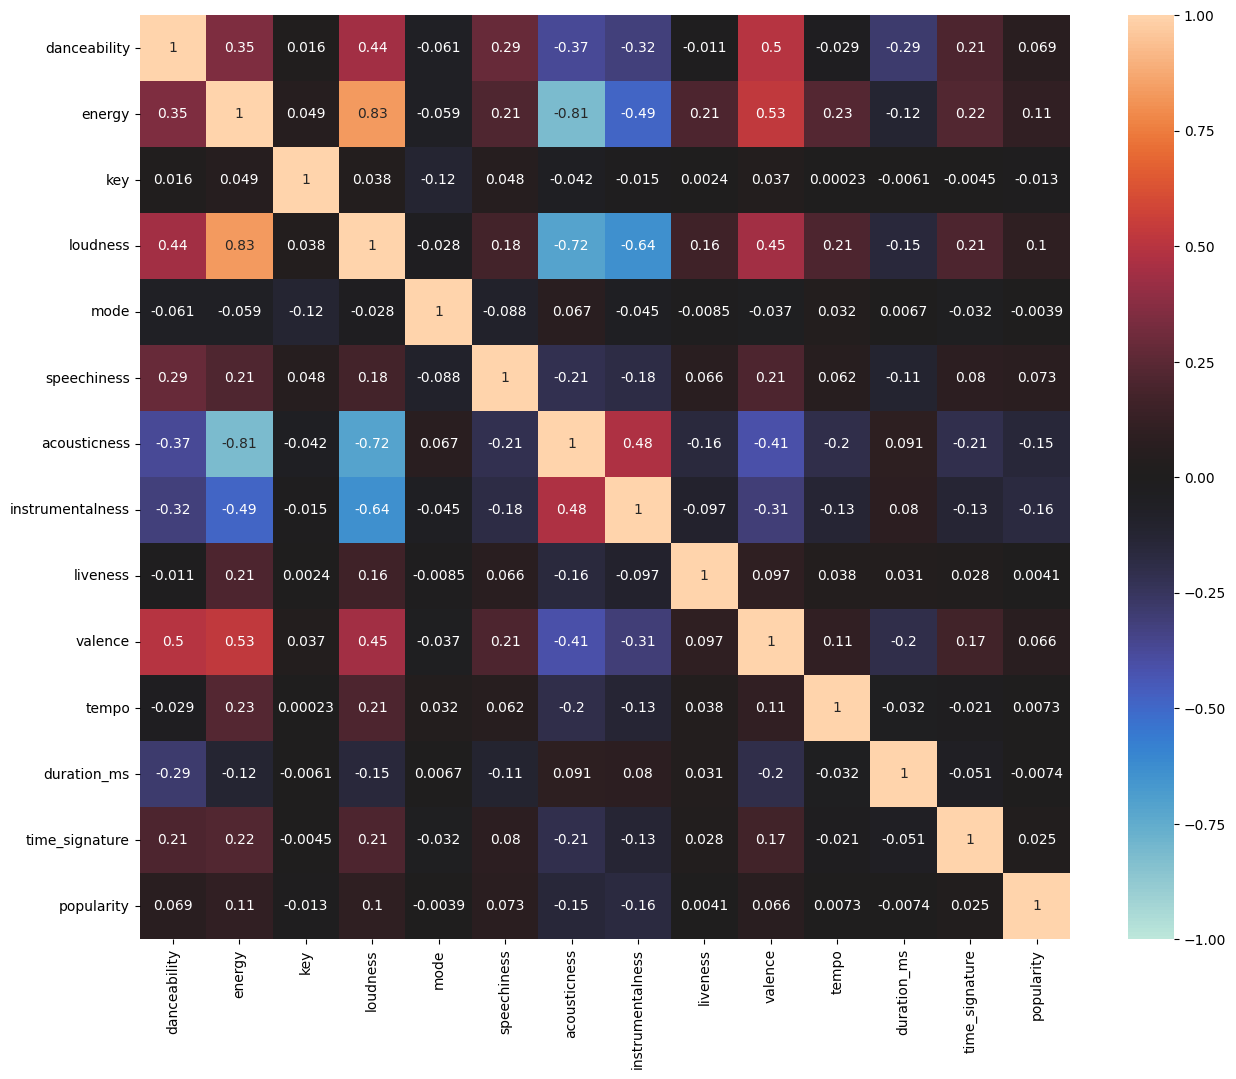

In [19]:
song_data_corr = song_data_numerical.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(song_data_corr, vmin=-1, vmax=1, center=0, annot=True)

In [45]:
genres = song_data['genre'].unique()

In [49]:
keys= song_data['key'].dropna().unique()

In [57]:
time_sigs = song_data['time_signature'].unique()

In [47]:
class_arr = np.array(song_data["genre"]) #one hot encode genre
for genre in genres:
  arr= class_arr == genre
  song_data_numerical[genre] = 1*arr


In [50]:
class_arr = np.array(song_data["key"]) #one hot encode key
for key in keys:
  arr= class_arr == key
  song_data_numerical['key' + str(key)] = 1*arr

In [58]:
class_arr = np.array(song_data['time_signature']) #one hot encode time_signature
for sig in time_sigs:
  arr= class_arr == sig
  song_data_numerical['time' + str(sig)] = 1*arr

We now have our genres one hot encoded

In [71]:
song_data_numerical = song_data_numerical.drop(columns=['key','time_signature'], axis=1)

In [69]:
song_data_numerical.columns

Index([    'danceability',           'energy',              'key',
               'loudness',             'mode',      'speechiness',
           'acousticness', 'instrumentalness',         'liveness',
                'valence',            'tempo',      'duration_ms',
         'time_signature',       'popularity',   'absolute music',
              'classical',       'electronic',             'folk',
                 'hiphop',             'jazz',          'popular',
                    'rnb',             'rock',               11.0,
                      6.0,                9.0,                2.0,
                      0.0,                5.0,                3.0,
                      4.0,                1.0,                8.0,
                     10.0,                7.0,          'time4.0',
                'time5.0',          'time3.0',          'time1.0',
                'time0.0'],
      dtype='object')

In [80]:
song_data_numerical['artist_name_length'] = song_data['artist'].apply(lambda x: len(str(x))) # adds column for artist name length

In [81]:
song_data_numerical['song_name_length'] = song_data['song_name'].apply(lambda x: len(str(x)))# adds column for song name length

In [82]:
song_data_numerical['energy'].max() # many columns are not min/maxed

1.0

In [83]:
cats_to_min_max = ['danceability','energy', 'speechiness',    'acousticness',   'instrumentalness',    'liveness',    'valence',    'tempo', 'song_name_length', 'artist_name_length']


Here we min max scale the columns using sklearn

In [84]:
from sklearn.preprocessing import MinMaxScaler
for cat in cats_to_min_max:
  scaler = MinMaxScaler()
  scaler.fit(song_data_numerical[[cat]])
  song_data_numerical[cat] = scaler.transform(np.array(song_data_numerical[cat]).reshape(-1,1))
song_data_numerical

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,8.0,10.0,7.0,time4.0,time5.0,time3.0,time1.0,time0.0,artist_name_length,song_name_length
0,0.757669,0.741785,-4.627,0.0,0.045093,0.005430,0.027172,0.041696,0.432790,0.572717,...,0,0,0,1,0,0,0,0,0.288136,0.173913
1,0.663599,0.976891,-4.391,1.0,0.103037,0.000640,0.668687,0.126593,0.225051,0.581548,...,0,0,0,1,0,0,0,0,0.169492,0.111801
2,0.808793,0.865366,-3.240,0.0,0.128505,0.037147,0.000022,0.074067,0.602851,0.563563,...,0,0,0,1,0,0,0,0,0.203390,0.142857
3,0.754601,0.864362,-4.141,1.0,0.276869,0.319276,0.001838,0.322041,0.590631,0.599860,...,0,0,0,1,0,0,0,0,0.135593,0.080745
4,0.661554,0.847281,-3.756,1.0,0.053388,0.013753,0.000665,0.095036,0.759674,0.667977,...,0,0,0,1,0,0,0,0,0.118644,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10125,0.479550,0.562943,-7.596,1.0,0.029322,0.008743,0.000005,0.334256,0.362525,0.398281,...,0,0,0,1,0,0,0,0,0.186441,0.149068
10126,0.468303,0.798049,-3.265,1.0,0.067056,0.003171,0.000204,0.068162,0.522403,0.560086,...,0,0,0,1,0,0,0,0,0.338983,0.049689
10127,0.688139,0.817139,-5.411,1.0,0.042874,0.013351,0.002960,0.340364,0.741344,0.669004,...,0,0,0,1,0,0,0,0,0.152542,0.124224
10128,0.399796,0.818144,-6.197,1.0,0.060514,0.017769,0.002283,0.272161,0.658859,0.383528,...,0,0,0,1,0,0,0,0,0.152542,0.111801


KeyboardInterrupt: 